In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
name = ['num_episodes', 'max_step', 'greedy', 'noise', 'lr_action', 'discount', 'end_epi', 'step', 'score', 'route']
data = pd.read_csv('./q_learn_test.csv', sep = '\t', header=None, names=name)
# EarlyStopping(patience=20, ratio=80)


In [3]:
data.head(300)

,num_episodes,max_step,greedy,noise,lr_action,discount,end_epi,step,score,route
0,1000,720,0.9,False,0,0.9,106,4401,41.518868,"[(9, 4), (8, 4), (7, 4), (7, 3), (7, 2), (7, 1..."
1,1000,720,0.9,False,0,0.9,100,3711,37.110000,"[(9, 4), (8, 4), (7, 4), (7, 3), (7, 2), (7, 1..."
2,1000,720,0.9,False,0,0.9,100,3518,35.180000,"[(9, 4), (8, 4), (7, 4), (7, 3), (7, 2), (7, 1..."
3,1000,720,0.9,False,0,0.9,73,1819,24.917808,"[(9, 4), (8, 4), (7, 4), (7, 3), (7, 2), (7, 1..."
4,1000,720,0.9,False,0,0.9,93,3561,38.290323,"[(9, 4), (8, 4), (7, 4), (7, 3), (7, 2), (7, 1..."
...,...,...,...,...,...,...,...,...,...,...
295,1000,720,0.7,False,0,0.9,97,3903,40.237113,"[(9, 4), (8, 4), (7, 4), (7, 3), (7, 2), (7, 1..."
296,1000,720,0.7,False,0,0.9,94,4181,44.478723,"[(9, 4), (8, 4), (8, 3), (8, 2), (8, 1), (7, 1..."
297,1000,720,0.7,False,0,0.9,101,4623,45.772277,"[(9, 4), (8, 4), (7, 4), (7, 3), (7, 2), (7, 1..."
298,1000,720,0.7,False,0,0.9,93,3489,37.516129,"[(9, 4), (8, 4), (8, 3), (8, 2), (8, 1), (7, 1..."


## greedy 별 datafame 생성

In [5]:
df_greedy = {}
for idx in range(1, 10):
    buf = data.where(data.greedy == idx/10).dropna()
    buf = buf[['discount', 'end_epi', 'step', 'score', 'route']]
    df_greedy[idx] = buf.reset_index(drop=True)


In [7]:
df_greedy[9].head(1000)

,discount,end_epi,step,score,route
0,0.9,106.0,4401.0,41.518868,"[(9, 4), (8, 4), (7, 4), (7, 3), (7, 2), (7, 1..."
1,0.9,100.0,3711.0,37.110000,"[(9, 4), (8, 4), (7, 4), (7, 3), (7, 2), (7, 1..."
2,0.9,100.0,3518.0,35.180000,"[(9, 4), (8, 4), (7, 4), (7, 3), (7, 2), (7, 1..."
3,0.9,73.0,1819.0,24.917808,"[(9, 4), (8, 4), (7, 4), (7, 3), (7, 2), (7, 1..."
4,0.9,93.0,3561.0,38.290323,"[(9, 4), (8, 4), (7, 4), (7, 3), (7, 2), (7, 1..."
...,...,...,...,...,...
995,0.0,999.0,149923.0,150.073073,"[(9, 4), (8, 4), (7, 4), (8, 4), (8, 5), (8, 4..."
996,0.0,999.0,143182.0,143.325325,"[(9, 4), (8, 4), (7, 4), (7, 3), (7, 2), (7, 1..."
997,0.0,999.0,147069.0,147.216216,"[(9, 4), (8, 4), (7, 4), (7, 3), (7, 4), (8, 4..."
998,0.0,999.0,136997.0,137.134134,"[(9, 4), (8, 4), (8, 5), (7, 5), (6, 5), (5, 5..."


## route 경로를 개수로 변환

In [8]:
for idx in range(1, 10):
    df_greedy[idx].route = df_greedy[idx].route.map(lambda x: len(x.split(','))/2)

    print(idx)
    print(df_greedy[idx])


1
     discount  end_epi     step       score  route
0         0.9     74.0   2277.0   30.770270   11.0
1         0.9     98.0   3989.0   40.704082   13.0
2         0.9     72.0   2287.0   31.763889   11.0
3         0.9     82.0   4440.0   54.146341   13.0
4         0.9     79.0   2155.0   27.278481   11.0
..        ...      ...      ...         ...    ...
995       0.0    102.0   8959.0   87.833333  397.0
996       0.0    144.0  19694.0  136.763889  233.0
997       0.0    113.0  11551.0  102.221239  171.0
998       0.0    131.0  13192.0  100.702290  179.0
999       0.0    131.0  15350.0  117.175573  241.0

[1000 rows x 5 columns]
2
     discount  end_epi      step       score  route
0         0.9     90.0    3489.0   38.766667   13.0
1         0.9    101.0    5252.0   52.000000   11.0
2         0.9    110.0    5534.0   50.309091   15.0
3         0.9     88.0    2257.0   25.647727   11.0
4         0.9     90.0    2898.0   32.200000   11.0
..        ...      ...       ...         ...   

## discount에 따라 평균 계산

In [9]:
gr_df = {}
for idx in range(1, 10):
    gr_df[idx] = df_greedy[idx].groupby('discount').mean()


In [10]:
for idx in range(1, 10):
    print(gr_df[idx])


          end_epi      step       score   route
discount                                       
0.0        111.21  12353.18  109.988979  203.56
0.1         85.08   3515.09   40.775964   11.30
0.2         85.36   3337.83   38.596198   11.40
0.3         84.37   3464.76   40.588303   11.58
0.4         85.94   3627.08   41.645013   11.26
0.5         85.16   3421.71   39.612788   11.52
0.6         85.99   3591.31   41.151510   11.62
0.7         85.95   3566.65   41.078745   11.96
0.8         84.75   3326.74   38.860053   11.32
0.9         84.99   3567.95   41.390410   11.42
          end_epi       step       score   route
discount                                        
0.0        864.74  133058.01  152.185437  174.71
0.1         92.67    3377.44   36.018857   11.40
0.2         93.74    3613.88   37.923809   11.14
0.3         92.52    3530.63   37.534359   11.40
0.4         93.98    3431.51   36.034323   11.28
0.5         93.09    3523.67   37.180650   11.64
0.6         92.49    3442.58   3

## greedy에 따라 시각화 

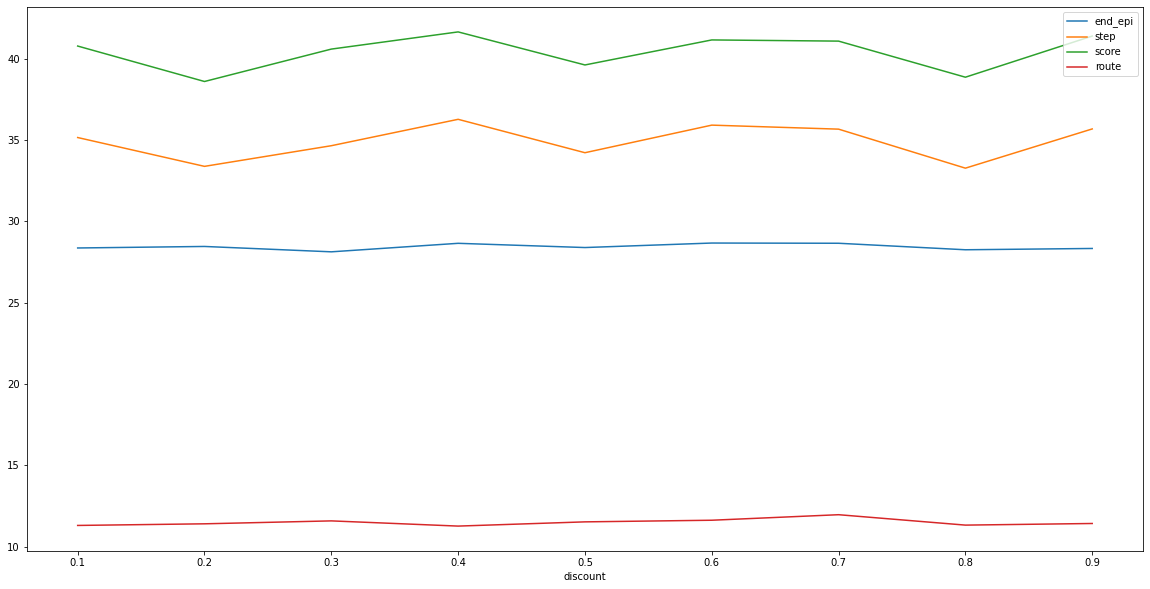

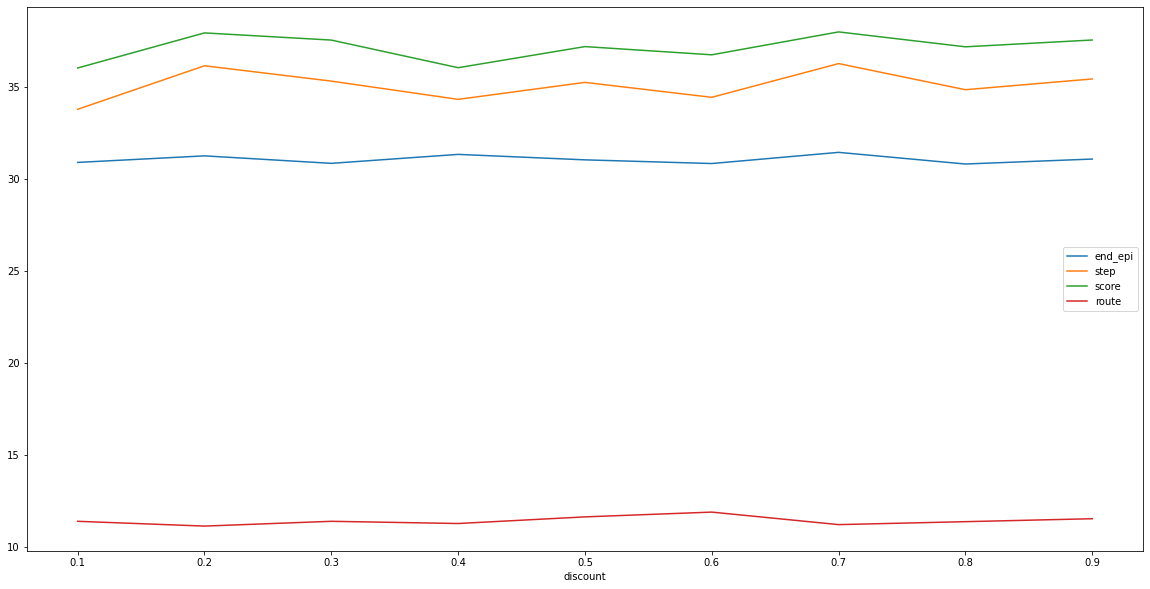

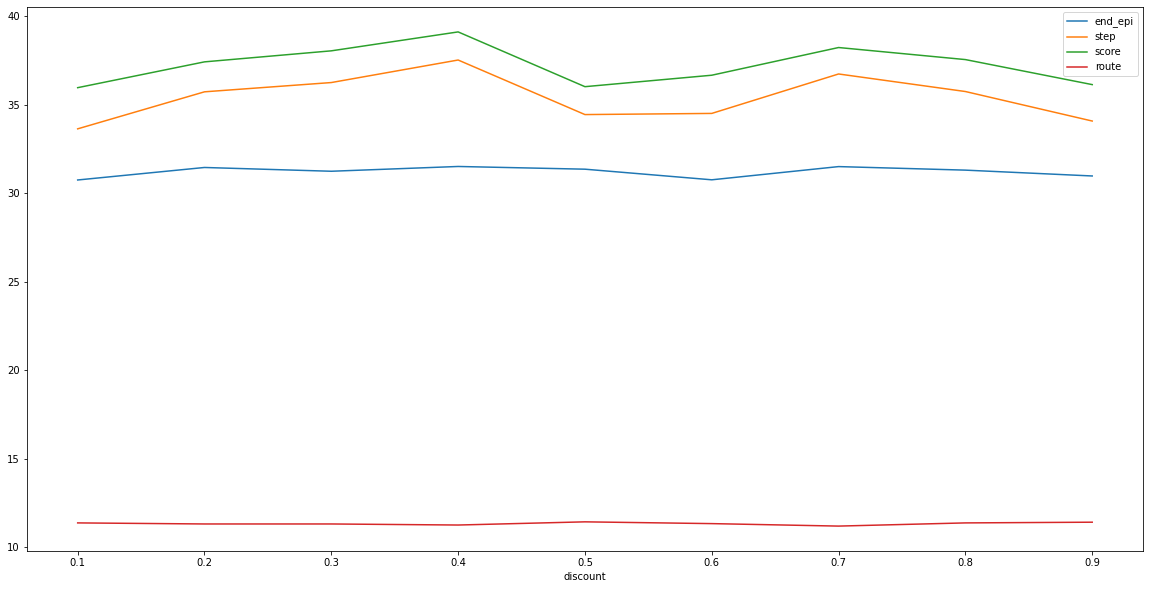

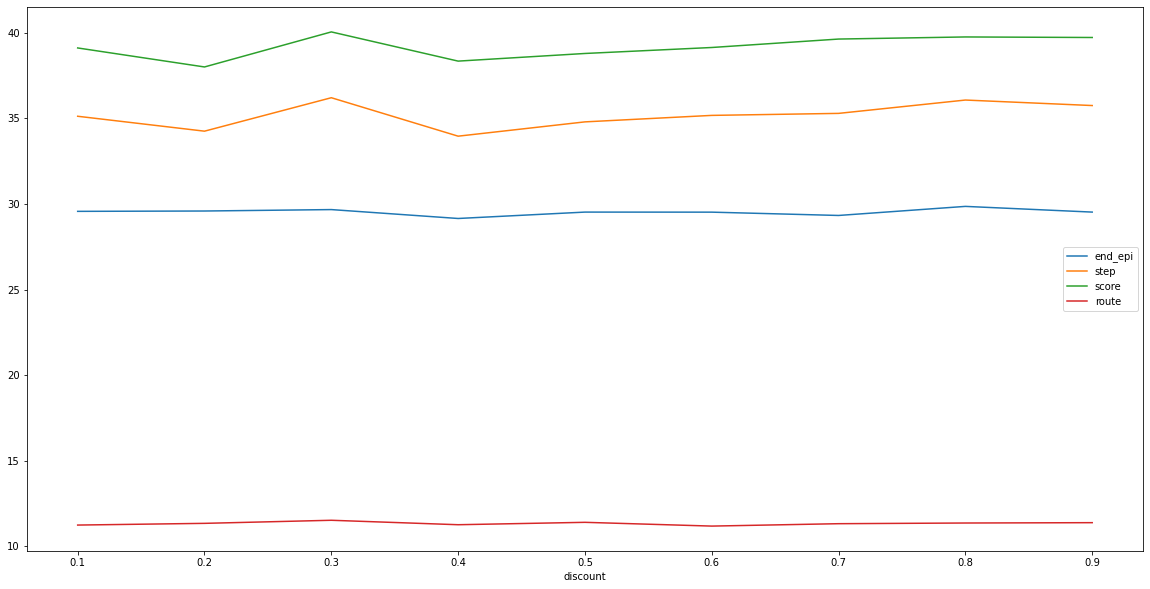

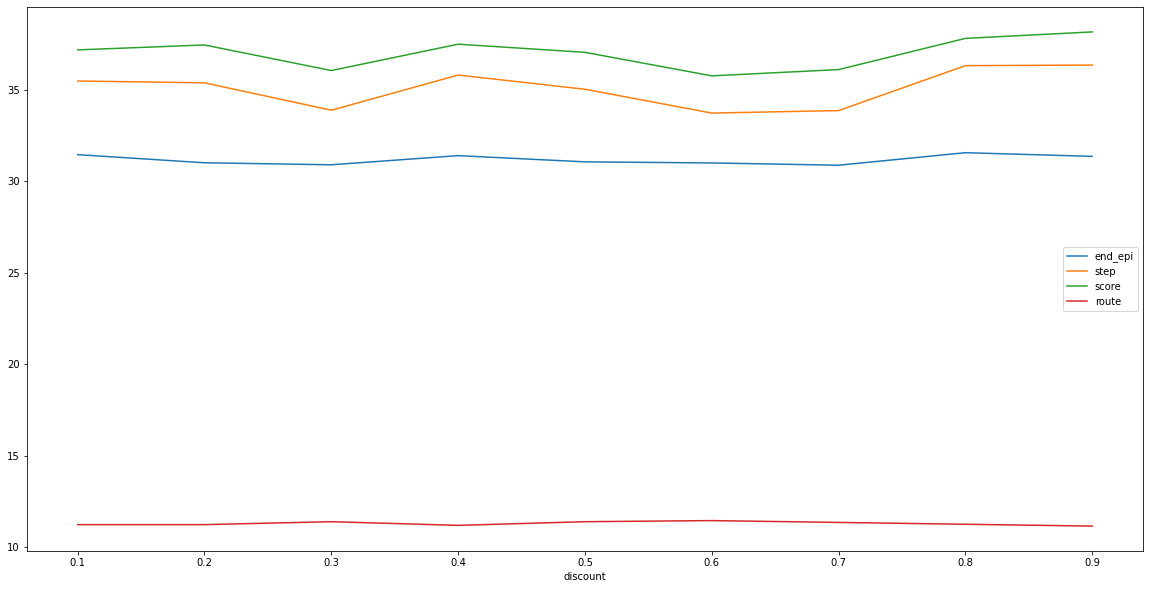

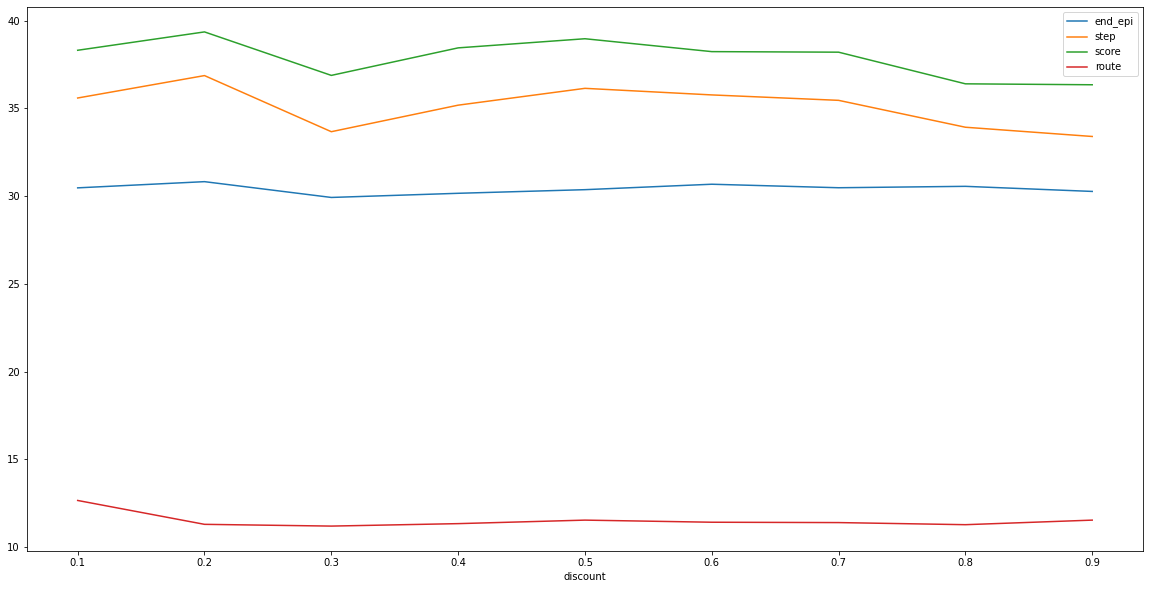

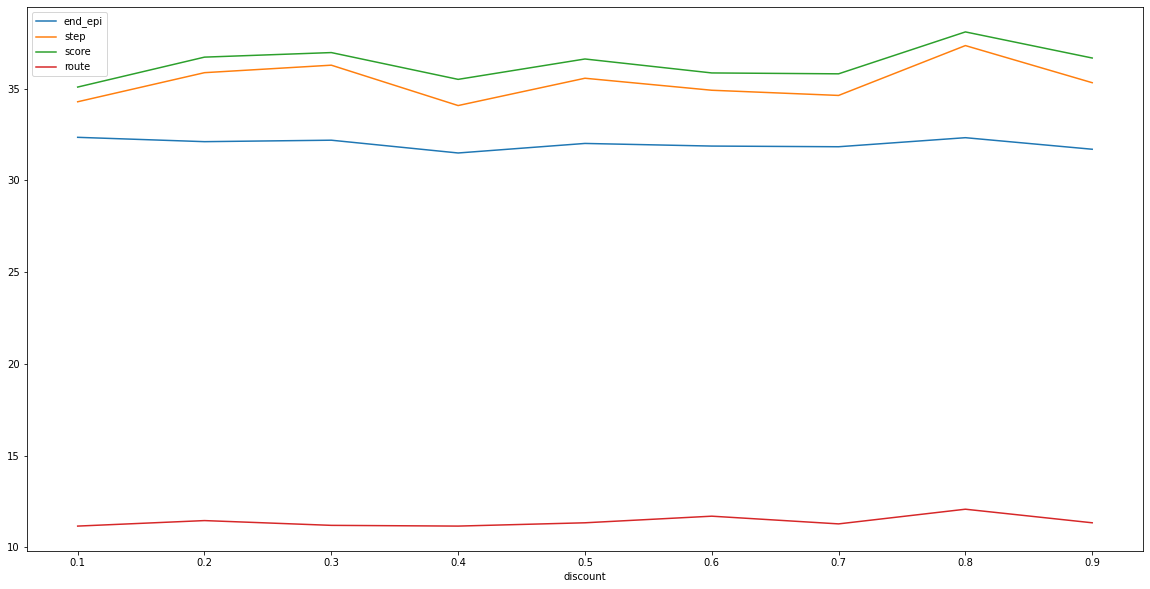

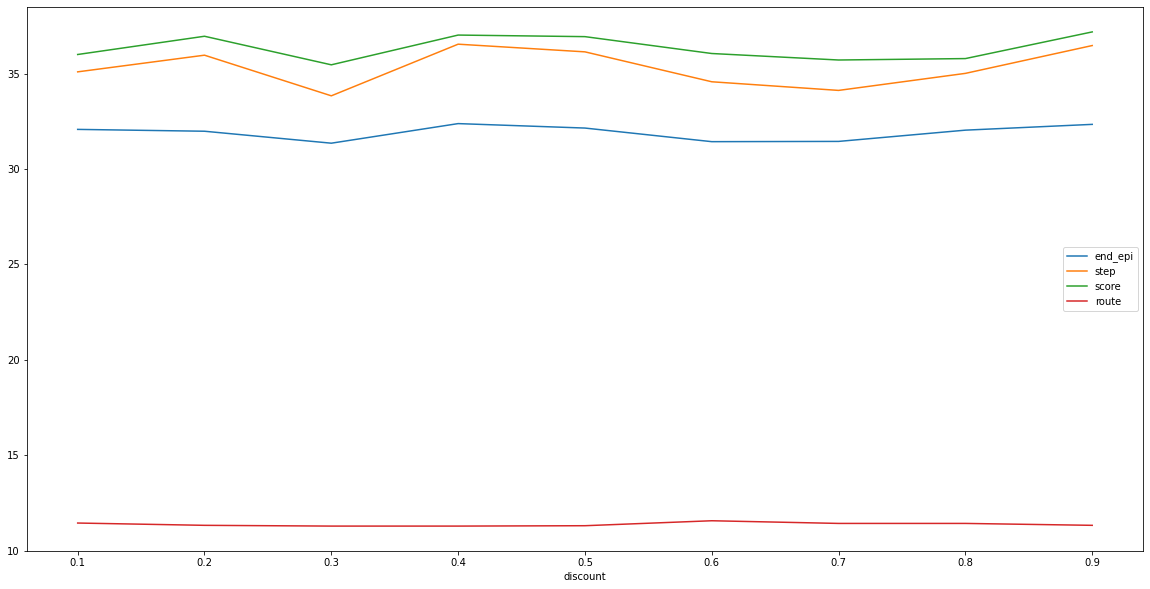

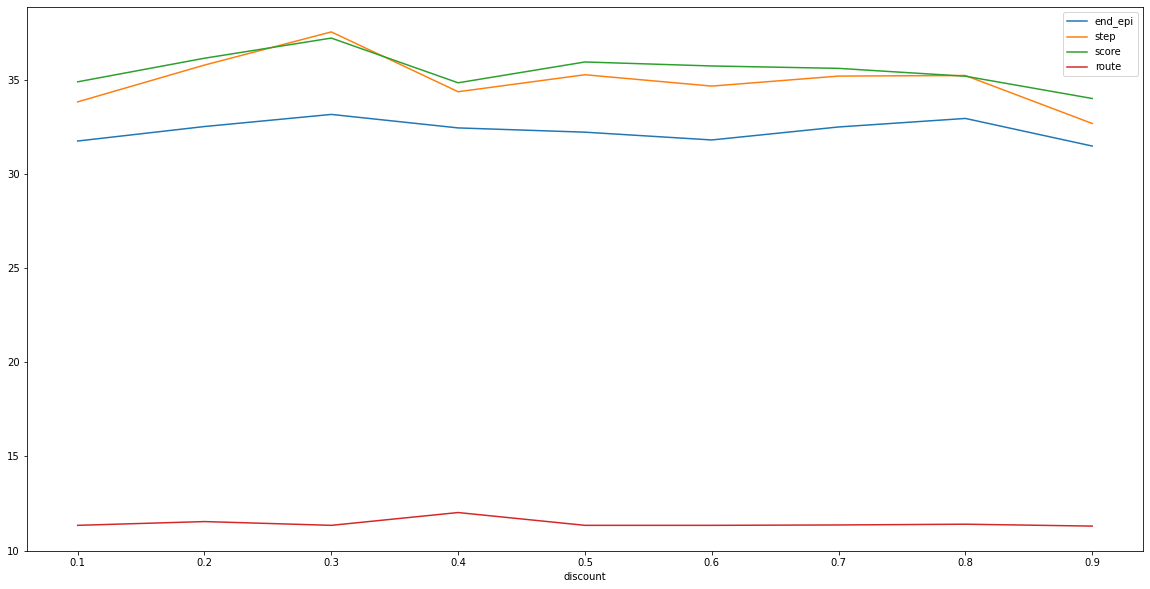

In [11]:
for idx in range(1, 10):
    gr_df[idx].step = gr_df[idx].step.map(lambda x: x/100)
    gr_df[idx].end_epi = gr_df[idx].end_epi.map(lambda x: x/3)
    gr_df[idx][0.1:].plot.line(figsize= (20, 10))


## greedy = 0.9; 'end_epi', 'step', 'score' 시각화 

<AxesSubplot:xlabel='discount'>

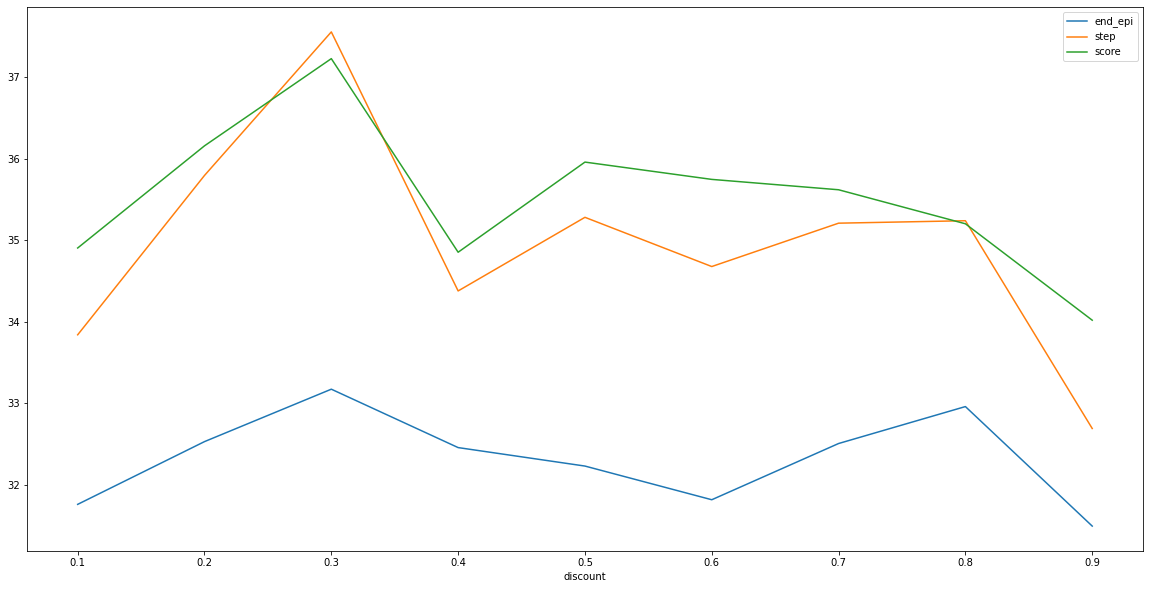

In [14]:
buf = gr_df[9][['end_epi', 'step', 'score']]
buf[0.1:].plot.line(figsize= (20, 10))
